In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

GRID_SIZE = 100
START = (0, 0)
GOAL = (99, 99)
OBSTACLE_DENSITY = 0.2

grid = np.zeros((GRID_SIZE, GRID_SIZE))

In [3]:
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if (i, j) != START and (i, j) != GOAL:
            grid[i, j] = 1 if random.random() < OBSTACLE_DENSITY else 0

In [4]:
grid[START] = 2
grid[GOAL] = 3

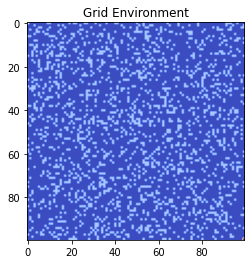

In [5]:
plt.imshow(grid, cmap='coolwarm')
plt.title("Grid Environment")
plt.show()

In [6]:
ACTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]
REWARD_GOAL = 100
REWARD_OBSTACLE = -100
REWARD_STEP = -1

In [7]:
value_table = np.zeros((GRID_SIZE, GRID_SIZE))
policy = np.full((GRID_SIZE, GRID_SIZE), ' ')

In [8]:
def is_valid_state(state):
    x, y = state
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and grid[x, y] != 1

In [9]:
def get_next_state(state, action):
    x, y = state
    dx, dy = action
    next_state = (x + dx, y + dy)
    if is_valid_state(next_state):
        return next_state
    return state

In [22]:
def value_iteration(theta=1e-4, discount_factor=0.99):
    while True:
        delta = 0
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                state = (i, j)
                if state == GOAL:
                    continue
                values = []
                for action in ACTIONS:
                    next_state = get_next_state(state, action)
                    reward = REWARD_GOAL if next_state == GOAL else REWARD_STEP
                    values.append(reward + discount_factor * value_table[next_state])
                best_value = max(values)
                delta = max(delta, abs(best_value - value_table[state]))
                value_table[state] = best_value
                policy[state] = np.argmax(values) 
        if delta < theta:
            break

In [23]:
value_iteration()
print("Optimal Value Table (snippet):\n", value_table[:10, :10])
print("Optimal Policy (snippet):\n", policy[:10, :10])

Optimal Value Table (snippet):
 [[-72.38383738 -72.10488624 -71.82311742 -71.53850244 -71.25101257
  -70.96061876 -70.66729167 -70.37100169 -70.07171888 -69.76941301]
 [-72.10488624 -71.82311742 -71.53850244 -71.25101257 -70.96061876
  -70.66729167 -70.37100169 -70.07171888 -69.76941301 -69.46405354]
 [-71.82311742 -71.53850244 -71.25101257 -71.53850244 -71.25101257
  -70.37100169 -70.07171888 -69.76941301 -69.46405354 -69.76941301]
 [-71.53850244 -71.25101257 -70.96061876 -71.25101257 -70.37100169
  -70.07171888 -69.76941301 -69.46405354 -69.15560964 -68.84405014]
 [-71.25101257 -70.96061876 -70.66729167 -70.96061876 -70.07171888
  -69.76941301 -69.46405354 -69.15560964 -68.84405014 -68.52934358]
 [-70.96061876 -70.66729167 -70.37100169 -70.07171888 -69.76941301
  -69.46405354 -69.15560964 -68.84405014 -68.52934358 -68.21145816]
 [-70.66729167 -70.37100169 -70.07171888 -69.76941301 -69.46405354
  -69.15560964 -68.84405014 -68.52934358 -68.21145816 -67.89036178]
 [-70.37100169 -70.0717

In [24]:
Q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

In [25]:
def q_learning(episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1):
    for episode in range(episodes):
        state = START
        while state != GOAL:
            if random.uniform(0, 1) < epsilon:
                action_idx = random.choice(range(len(ACTIONS)))
            else:
                action_idx = np.argmax(Q_table[state])
            action = ACTIONS[action_idx]
            next_state = get_next_state(state, action)
            reward = REWARD_GOAL if next_state == GOAL else REWARD_STEP
            best_next_action = np.argmax(Q_table[next_state])
            Q_table[state][action_idx] += alpha * (
                reward + gamma * Q_table[next_state][best_next_action] - Q_table[state][action_idx]
            )
            state = next_state

In [26]:
q_learning()
print("Q-Table (snippet):\n", Q_table[:10, :10, :])

Q-Table (snippet):
 [[[-32.23932706 -32.2846774  -32.25344067 -32.27312557]
  [-31.74905286 -31.80921759 -31.78860814 -31.77698803]
  [-31.31418253 -31.40144524 -31.37206702 -31.37194069]
  [-30.89257681 -30.96921392 -30.89468947 -30.9226174 ]
  [-30.50099152 -30.54608847 -30.51836263 -30.5957517 ]
  [-30.14595895 -30.22760861 -30.1256871  -30.1546538 ]
  [-29.81569679 -29.89863942 -29.84953767 -29.80900223]
  [-29.48252762 -29.54792296 -29.56667339 -29.52302071]
  [-29.29577456 -29.34960801 -29.29663306 -29.31735301]
  [  0.           0.           0.           0.        ]]

 [[-31.80510453 -31.81422742 -31.77738236 -31.86862564]
  [-31.60308057 -31.596193   -31.50686839 -31.51541504]
  [-31.32014165 -31.34874592 -31.33635046 -31.3133564 ]
  [  0.           0.           0.           0.        ]
  [-30.40051155 -30.37497259 -30.42345543 -30.36441184]
  [-30.07286168 -30.10681679 -30.11452805 -30.08708269]
  [-29.73388873 -29.71904303 -29.76329914 -29.83225292]
  [-29.37418424 -29.447268

In [27]:
def evaluate_policy(start, policy):
    state = start
    steps = 0
    while state != GOAL:
        action_idx = policy[state] 
        action = ACTIONS[action_idx]  
        next_state = get_next_state(state, action)
        if state == next_state:
            print("No path found.")
            return -1
        state = next_state
        steps += 1
    return steps

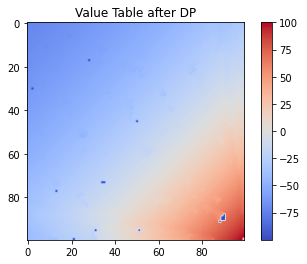

In [29]:
plt.imshow(value_table, cmap='coolwarm')
plt.title("Value Table after DP")
plt.colorbar()
plt.show()